In [3]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import pandas as pd

In [5]:
df = pd.read_csv("/content/spam_emails.csv")
df.head()

,num_links,num_attachments,sender_reputation,is_spam
0,1,2,0.188025,no
1,4,1,0.355385,no
2,3,4,0.783792,no
3,2,4,0.554227,no
4,6,1,0.005230,no


from matplotlib import pyplot as plt
_df_0['num_links'].plot(kind='hist', bins=20, title='num_links')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['num_attachments'].plot(kind='hist', bins=20, title='num_attachments')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['sender_reputation'].plot(kind='hist', bins=20, title='sender_reputation')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='num_links', y='num_attachments', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='num_attachments', y='sender_reputation', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5['num_links'].plot(kind='line', figsize=(8, 4), title='num_links')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_6['num_attachments'].plot(kind='line', figsize=(8, 4), title='num_attachments')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_7['sender_reputation'].plot(kind='line', figsize=(8, 4), title='sender_reputation')
plt.gca().spines[['top', 'right']].set_visible(False)

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns


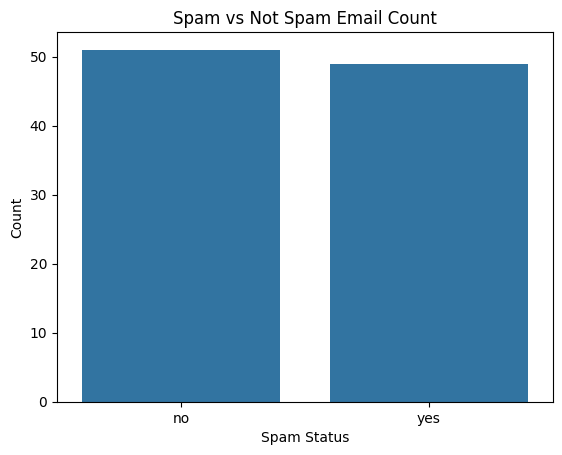

In [7]:
sns.countplot(x='is_spam', data=df)
plt.title("Spam vs Not Spam Email Count")
plt.xlabel("Spam Status")
plt.ylabel("Count")
plt.show()

In [8]:
from sklearn.preprocessing import LabelEncoder


In [9]:
df['is_spam'] = LabelEncoder().fit_transform(df['is_spam'])  # yes -> 1, no -> 0
X = df.drop('is_spam', axis=1)
y = df['is_spam']

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [12]:
y_pred = model.predict(X_test)

In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay


In [14]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
print(f"Accuracy: {acc:.2f}")
print(f"Precision: {prec:.2f}")
print(f"Recall: {rec:.2f}")


Accuracy: 0.50
Precision: 0.43
Recall: 0.33


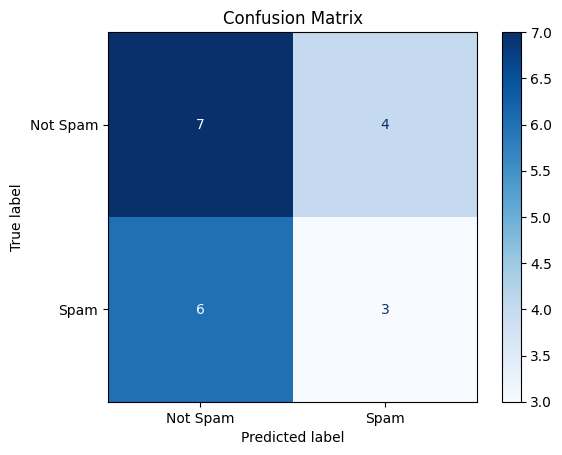

In [15]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Spam', 'Spam'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

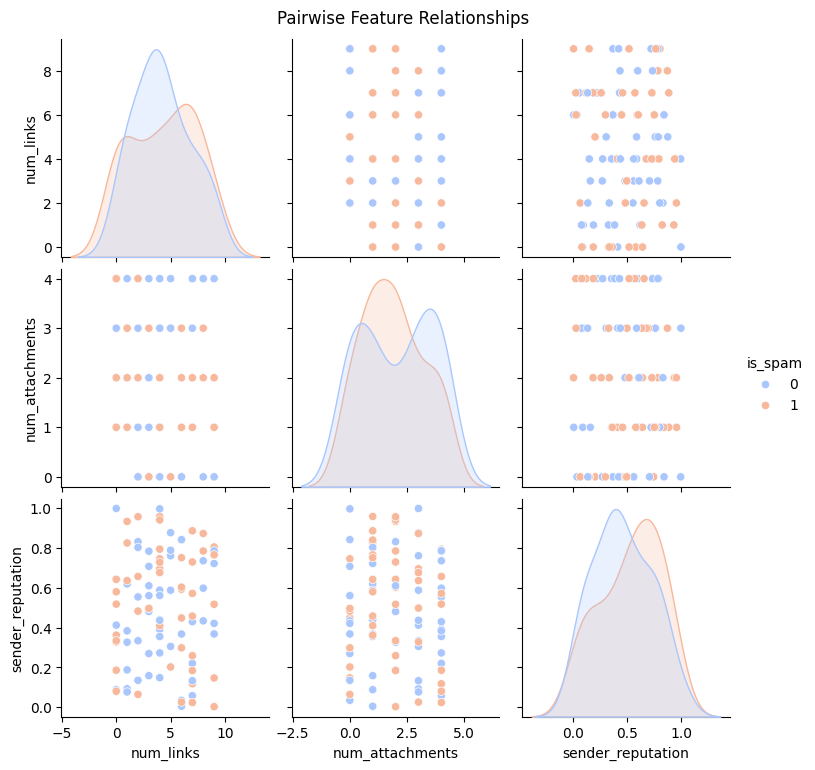

In [16]:
sns.pairplot(df, hue='is_spam', palette='coolwarm')
plt.suptitle("Pairwise Feature Relationships", y=1.02)
plt.show()